# Autoencoders and Stacked Autoencoders with MNIST
An autoencoder is a type of artificial neural network used to learn efficient data coding in an unsupervised manner. There are two parts in an autoencoder: the encoder and the decoder. The encoder is used to generate a reduced feature representation from an initial input x by a hidden layer h. The decoder is used to reconstruct the initial input from the encoder's output by minimizing the loss function.The stacked autoencoders are, as the name suggests, multiple encoders stacked on top of one another.

In this study will be used a dataset of handwritten digits in gray scale to build a latent space representation able to be decoded to reproduce an output equal to the input and to remove noises from the images.

## Tensorflow importation


In [10]:
%pylab inline

from tensorflow import keras

Populating the interactive namespace from numpy and matplotlib


## Dataset Load
To begin, it will be necessary to load the dataset and split it in two parts: one that will be used for the training and another one for the tests.

In [11]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

## First Part - Dense model for encoding and decoding
In this first part, a simple autoencoder model will be created in two parts. One part will be de encoder and the other the decoder, both using dense neural network. Only after this the stacked autoencoder will be created and then the encoder and the decoder will be trained at the same time. 

The main objective is to reduce the latent space representation more than an autoencoder could do.

In [12]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
])

In [13]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

##Summary analysis of the encoder and decoder
Analysing the encoder and the decoder summary, it can be concluded that the model successfully compressed the dimensions of the dataset and brought it back to it's original dimensions through the decoder.

While the encoder reduced the dimensions from 784 to 30, the decoder transformed from 30 to 784, and then to 28 x 28 image, returning to it's original dimension.

In [14]:
encoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
Total params: 81,530
Trainable params: 81,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
decoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               3100      
                                                                 
 dense_9 (Dense)             (None, 784)               79184     
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 82,284
Trainable params: 82,284
Non-trainable params: 0
_________________________________________________________________


##Stacked Autoencoder
After creating the encoder and the decoder, they can be used as input and ouput of an autoencoder model.

Then the model is compiled using "adam" optimizer and the loss will be analysed using the binary crossentropy.

In [16]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

stacked_autoencoder.compile(loss="binary_crossentropy",
                   optimizer='adam')

##Model training
Then, the model is trained and validated using part of the original dataset for training and part for the validation.

In [17]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=3,
                                  validation_data=(x_test, x_test))

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1458 - val_loss: 0.1065
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1020 - val_loss: 0.0967
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0964 - val_loss: 0.0937


##Images reconstruction
Now, part of the original dataset is printed along with the output of the autoencoder so it can be compared with one another.

1/1 [==============================] - 0s 17ms/step


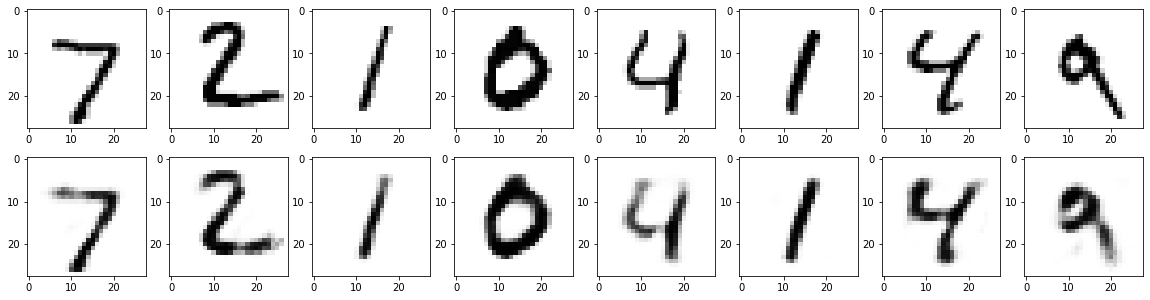

In [18]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

##Image comparison
Now, it's possible to compare the input image with the stacked autoencoder output image. Besides that, it's possible to calculate the difference between the images dimensions with one another.

1/1 [==============================] - 0s 37ms/step
[[14.329346   6.7922497 15.065919   0.         4.556929   9.643408
   6.314905   8.088185   7.193011  13.178225  13.506027  13.607141
  11.076798  15.541721  13.107387  14.669193  16.096634   0.
   9.025664   9.384999  10.029433   9.38294   15.651785   6.025882
   9.57674    9.129276   8.531995  11.014496  13.181781   5.5215373]]
1/1 [==============================] - 0s 43ms/step


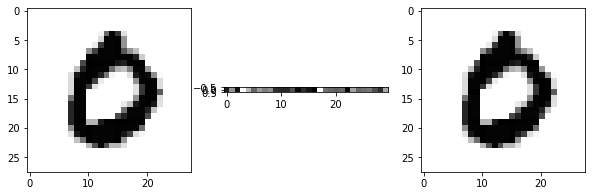

In [19]:
i = 3

figsize(10, 5)

subplot(1, 3, 1)
imshow(x_test[i], cmap="binary")

subplot(1, 3, 2)
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
imshow(latent_vector, cmap="binary")
print(latent_vector)

subplot(1, 3, 3)
pred = decoder.predict(latent_vector)
imshow(x_test[i], cmap="binary")

In [20]:
30 / (28 * 28), 1 - 30 / (28 * 28)

(0.03826530612244898, 0.9617346938775511)

##First part conclusion
As seen before, with stacked autoencoders it was possible to reduce the dimensions in 96%. 

However, it's important to note that the bigger the resolution of the images the less it dimensions can be reduced into the latent space representation. Thus, less compressed the images can be.

##Second Part - Convolutional neural network for encoding and decoding
In this second part, a simple autoencoder model will be created in two parts again, but this time using convolutional neural network. Once more, after creating the model, the stacked autoencoder will be created and then the encoder and the decoder will be trained at the same time.

Again, the main objective is to reduce the latent space representation more than an autoencoder could do.

In [21]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2)
])

In [22]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="valid",
                                 activation="relu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="relu"),
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

##Stacked autoencoder
After creating the encoder and the decoder, they can be used as input and ouput of an autoencoder model.

Then the model is compiled using "adam" optimizer and the loss will be analysed using the binary crossentropy.

In [23]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [24]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

##Model training
Then, the model is trained and validated using part of the original dataset for training and part for the validation.

In [25]:
history = stacked_autoencoder.fit(x_train, x_train, epochs=10,
                         validation_data=[x_test, x_test])

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.1228 - val_loss: 0.0832
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0810 - val_loss: 0.0772
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0766 - val_loss: 0.0746
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0742 - val_loss: 0.0729
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0726 - val_loss: 0.0716
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0716 - val_loss: 0.0707
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0709 - val_loss: 0.0699
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0703 - val_loss: 0.0695
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0698 - val_loss: 0.0693
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.06

##Images reconstruction
Now, part of the original dataset is printed along with the output of the autoencoder so it can be compared with one another.

1/1 [==============================] - 0s 17ms/step


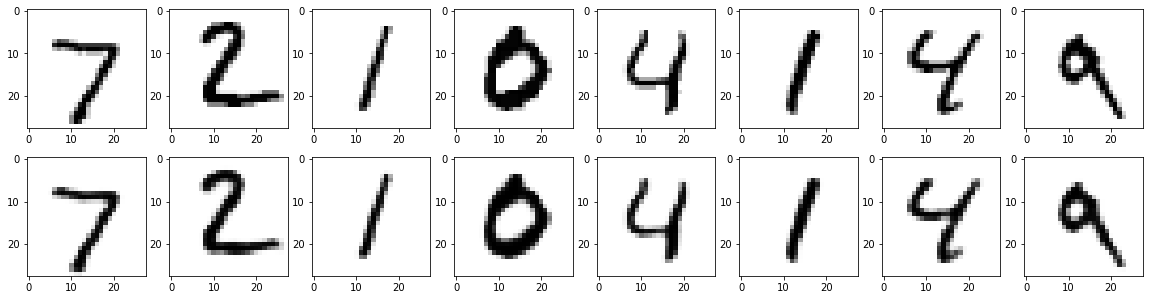

In [26]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  imshow(x_test[i], cmap="binary")

  subplot(2, 8, i+8+1)
  imshow(pred.reshape((28, 28)), cmap="binary")

##Second part conclusion
Using convolutional neural networks it was possible to train a model capable of learning the input patterns and trough the stacked autoencoder output it was rebuilded with big fidelity to it's originals data.

##Third Part - Noise removal with stacked autoencoders
For this final part, dense neural networks will be used with stacked autoencoders to remove noises from the images. To simulate possible noises, random values will be added to the original dataset.

The main objective is to model a stacked autoencoder capable of filtering the noises in the dataset.

##Original and noisy plotting and comparison

To see what the differences between the original and the noisy dataset will be, initially an image from the original dataset is printed along with it's noisy pair.

In [27]:
import numpy as np

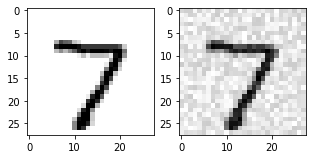

In [28]:
figsize(5, 10)
subplot(1, 2, 1)
imshow(x_test[0], cmap="binary")

subplot(1, 2, 2)
noise = np.random.random((28, 28)) / 4
imshow(x_test[0] + noise, cmap="binary")

##Dense model for encoding and decoding
Once more, the encoder and the decoder are created separately using dense neural network.

In [29]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu")
])

In [30]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

##Stacked Autoencoder
After creating the encoder and the decoder, they can be used as input and ouput of an autoencoder model.

Then the model is compiled using "adam" optimizer and the loss will be analysed using the binary crossentropy.

In [ ]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
stacked_autoencoder.compile(loss="binary_crossentropy",
                            optimizer='adam')

##Noise insertion in the dataset
To test the stacked autoencoder, now it will be inserted random values in the original dataset to simulate the noises.

In [31]:
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)

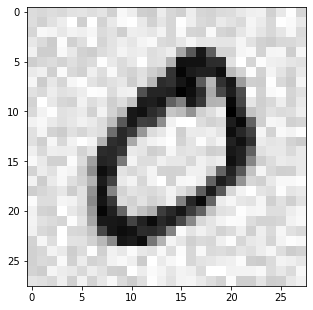

In [32]:
imshow(x_train_noise[1], cmap="binary")

##Model training
Then, the model is trained and validated using part of the original dataset with noise for training and part for the validation.

In [33]:
history = stacked_autoencoder.fit(x_train_noise, x_train, epochs=10,
                                  validation_data=(x_test_noise, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0733 - val_loss: 0.0712
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0712 - val_loss: 0.0702
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0707 - val_loss: 0.0700
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0704 - val_loss: 0.0697
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0701 - val_loss: 0.0696
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0699 - val_loss: 0.0693
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0697 - val_loss: 0.0691
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0696 - val_loss: 0.0692
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0695 - val_loss: 0.0688
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.069

##Images reconstruction
Now, part of the original dataset is printed along with the noisy dataset to analyse if the stacked autoencoder successfully removed the noises.

1/1 [==============================] - 0s 16ms/step


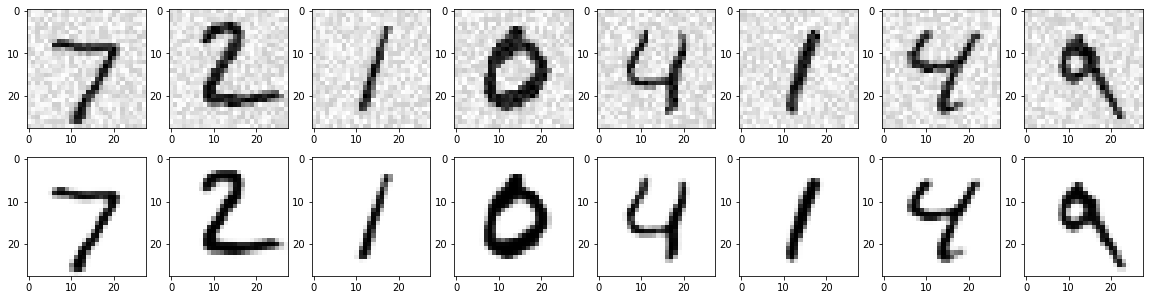

In [34]:
figsize(20, 5)
for i in range(8):
  subplot(2, 8, i+1)
  imshow(x_test_noise[i], cmap="binary")

  subplot(2, 8, i+8+1)
  pred = stacked_autoencoder.predict(x_test_noise[i].reshape((1, 28, 28)))
  imshow(pred.reshape((28, 28)), cmap="binary")

##Third part conclusion
Using dense neural networks with stacked autoencoders it was possivel to remove the noises inserted even when the training used the noisy dataset to train and to validate, showing the power of this tool to remove noises.